In [8]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, f1_score

#from xgboost import XGBRegressor

In [9]:
mainDF = pd.read_csv('proH&AData.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna()

In [10]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'MinutesSinceMidnight','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [12]:
#Normalise Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 51583367.93131816
Mean Absolute Error: 5427.4049335001255
R-squared: 0.8034464472959906


In [16]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
234,53014,42861.728511
1580,22859,32134.157749
487,15862,19890.148037
806,24552,23471.869166
1244,46095,44973.445011
...,...,...
434,29391,28802.137824
911,16622,24438.293678
849,19086,30366.786306
272,10891,15487.521831


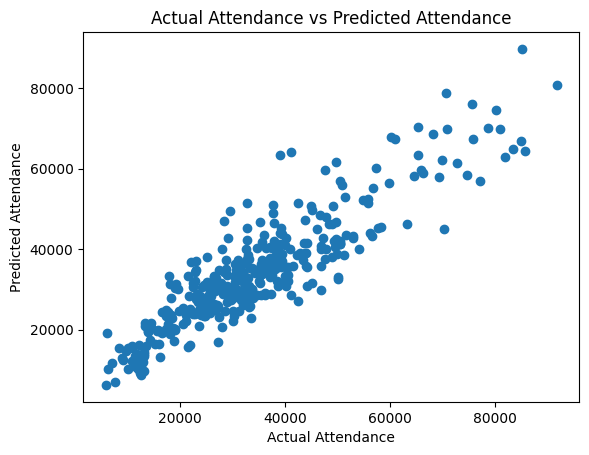

In [17]:
# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.show()


Feature: 0, Score: 0.01648
Feature: 1, Score: 0.00653
Feature: 2, Score: 0.01543
Feature: 3, Score: 0.00333
Feature: 4, Score: 0.00360
Feature: 5, Score: 0.59215
Feature: 6, Score: 0.07745
Feature: 7, Score: 0.08891
Feature: 8, Score: 0.07591
Feature: 9, Score: 0.03340
Feature: 10, Score: 0.00736
Feature: 11, Score: 0.01584
Feature: 12, Score: 0.03610
Feature: 13, Score: 0.02752


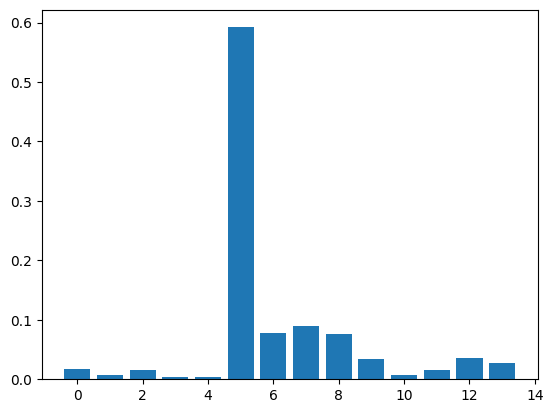

In [18]:
#plot feature importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Cat Boosting

In [19]:
from catboost import CatBoostRegressor

In [20]:
mainDF = pd.read_csv('proCatH&AData.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna()

In [21]:
categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']
cbr = CatBoostRegressor(loss_function='RMSE', cat_features=categorical_features, random_state=42)

In [22]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'StartTime','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

c:\Users\raadr\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 15976.5168382	total: 215ms	remaining: 42.8s
1:	learn: 15187.0263368	total: 262ms	remaining: 26s
2:	learn: 14298.3098775	total: 337ms	remaining: 22.2s
3:	learn: 13655.8047197	total: 431ms	remaining: 21.1s
4:	learn: 12937.2651329	total: 508ms	remaining: 19.8s
5:	learn: 12419.9229860	total: 558ms	remaining: 18s
6:	learn: 11849.4378624	total: 606ms	remaining: 16.7s
7:	learn: 11439.1545501	total: 643ms	remaining: 15.4s
8:	learn: 10993.5472244	total: 675ms	remaining: 14.3s
9:	learn: 10680.4943157	total: 704ms	remaining: 13.4s
10:	learn: 10311.8056109	total: 739ms	remaining: 12.7s
11:	learn: 9950.3822808	total: 769ms	remaining: 12s
12:	learn: 9637.1124176	total: 801ms	remaining: 11.5s
13:	learn: 9450.0926888	total: 833ms	remaining: 11.1s
14:	learn: 9220.4355996	total: 864ms	remaining: 10.7s
15:	learn: 9019.8248062	total: 898ms	remaining: 10.3s
16:	learn: 8859.1933666	total: 930ms	remaining: 10s
17:	learn: 8705.1061188	total: 973ms	remaining: 9.84s
18:	learn: 8525.0107517	total: 1.02

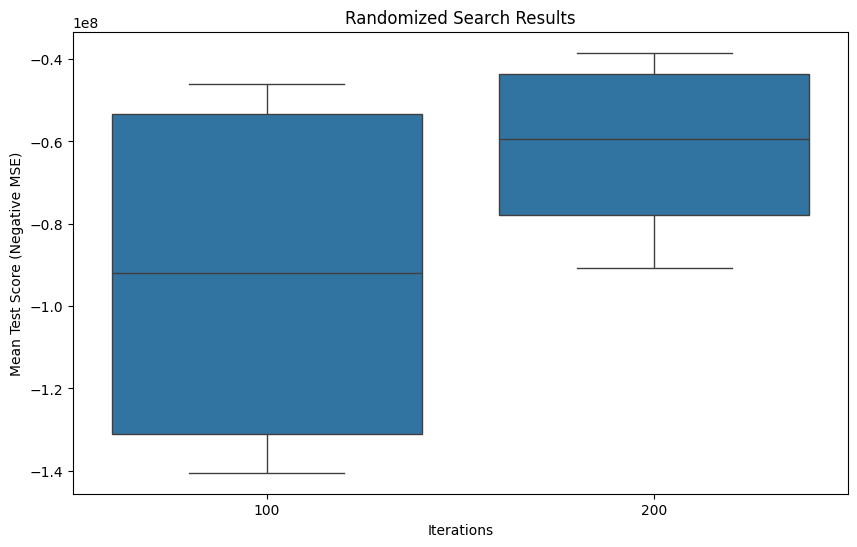

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(cbr, param_distributions=param_dist, n_iter=10, cv=5, scoring=scorer, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)
# Plot the results of the Randomized Search
results = pd.DataFrame(random_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.boxplot(x='param_iterations', y='mean_test_score', data=results)
plt.xlabel('Iterations')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Randomized Search Results')
plt.show()

In [25]:

# Specify the categorical features
categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']

cbr.fit(X_train, y_train, cat_features=categorical_features)


Learning rate set to 0.043985
0:	learn: 16519.7421523	total: 71.7ms	remaining: 1m 11s
1:	learn: 16092.1960607	total: 94.7ms	remaining: 47.3s
2:	learn: 15656.1494772	total: 124ms	remaining: 41.1s
3:	learn: 15270.2857193	total: 157ms	remaining: 39.2s
4:	learn: 14851.2294591	total: 186ms	remaining: 37.1s
5:	learn: 14467.1245876	total: 217ms	remaining: 36s
6:	learn: 14094.3369823	total: 250ms	remaining: 35.5s
7:	learn: 13761.6796477	total: 285ms	remaining: 35.4s
8:	learn: 13443.2835584	total: 319ms	remaining: 35.1s
9:	learn: 13132.6220353	total: 349ms	remaining: 34.6s
10:	learn: 12833.3910251	total: 380ms	remaining: 34.2s
11:	learn: 12596.8121099	total: 419ms	remaining: 34.5s
12:	learn: 12357.0526528	total: 454ms	remaining: 34.5s
13:	learn: 12130.8783979	total: 482ms	remaining: 34s
14:	learn: 11884.7534559	total: 513ms	remaining: 33.7s
15:	learn: 11687.1540886	total: 546ms	remaining: 33.6s
16:	learn: 11462.0206190	total: 578ms	remaining: 33.4s
17:	learn: 11265.2723679	total: 615ms	remainin

In [26]:
y_pred = cbr.predict(X_test)

In [27]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 34830204.28417649
Mean Absolute Error: 4160.687042068584
R-squared: 0.8867790598350161


In [28]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
868,20184,29886.299929
1497,29553,30713.596372
56,8603,5449.283900
1113,56593,51721.864611
870,9612,15002.354052
...,...,...
1417,17207,19220.920074
1249,21850,22152.711779
334,14022,14397.922450
1350,68857,59819.217127


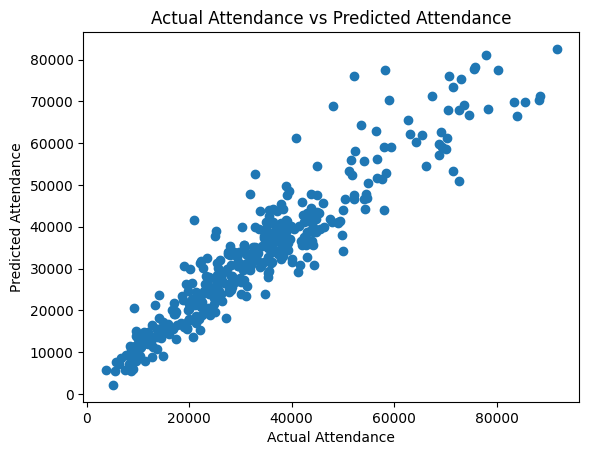

In [29]:
# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.show()


In [30]:
%pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [31]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [33]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'StartTime','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [46]:
categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']

for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, reference = train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 11,
    'learning_rate': 0.05,
}

booster = lgb.train(params, train_data, 100, valid_sets=[train_data, test_data])

y_pred = booster.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 1574, number of used features: 14
[LightGBM] [Info] Start training from score 33197.365947


In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for Random Search
param_dist_lgb = {
    'num_leaves': [7, 15, 31],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 3, 5, 7]
}

# Perform Randomized Search with cross-validation
random_search_lgb = RandomizedSearchCV(lgr, param_distributions=param_dist_lgb, n_iter=10, cv=5, scoring=scorer, n_jobs=-1, random_state=42)
random_search_lgb.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters for LightGBM:", random_search_lgb.best_params_)

# Train the model with the best hyperparameters
best_lgr = random_search_lgb.best_estimator_
best_lgr.fit(X_train, y_train)

# Predict using the best model
y_pred_best = best_lgr.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 1574, number of used features: 14
[LightGBM] [Info] Start training from score 33197.365947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [47]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 40063482.40373014
Mean Absolute Error: 4584.222498966247
R-squared: 0.8697674837900865


In [48]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
868,20184,30365.023562
1497,29553,32411.834139
56,8603,7538.221456
1113,56593,45731.793997
870,9612,12518.283048
...,...,...
1417,17207,21372.605006
1249,21850,22606.247798
334,14022,13620.620801
1350,68857,59745.111984


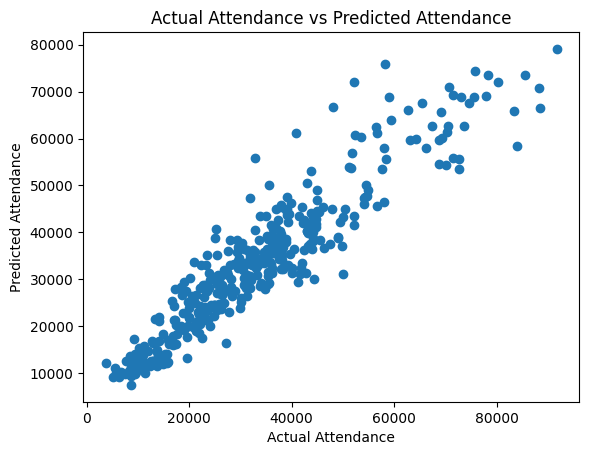

In [49]:
# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.show()
